In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#hist = hist.history
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

The dataset is available in 2 files; for training(labelled) and testing(unlabelled). We fetch them using pandas read_csv

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smp_train.csv")
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/smp_test.csv")

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
train.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Category 0: Low-End Price Bracket (10,000 - 33,000 INR approx.)

Category 1: Mid Range Price Bracket (33,000 - 66,000 INR approx.)

Category 2: High-End Price Bracket (66,000 - 99,000 INR approx.)

Category 3: Very High-End/Flagship Price Bracket (1 lakh + approx.)

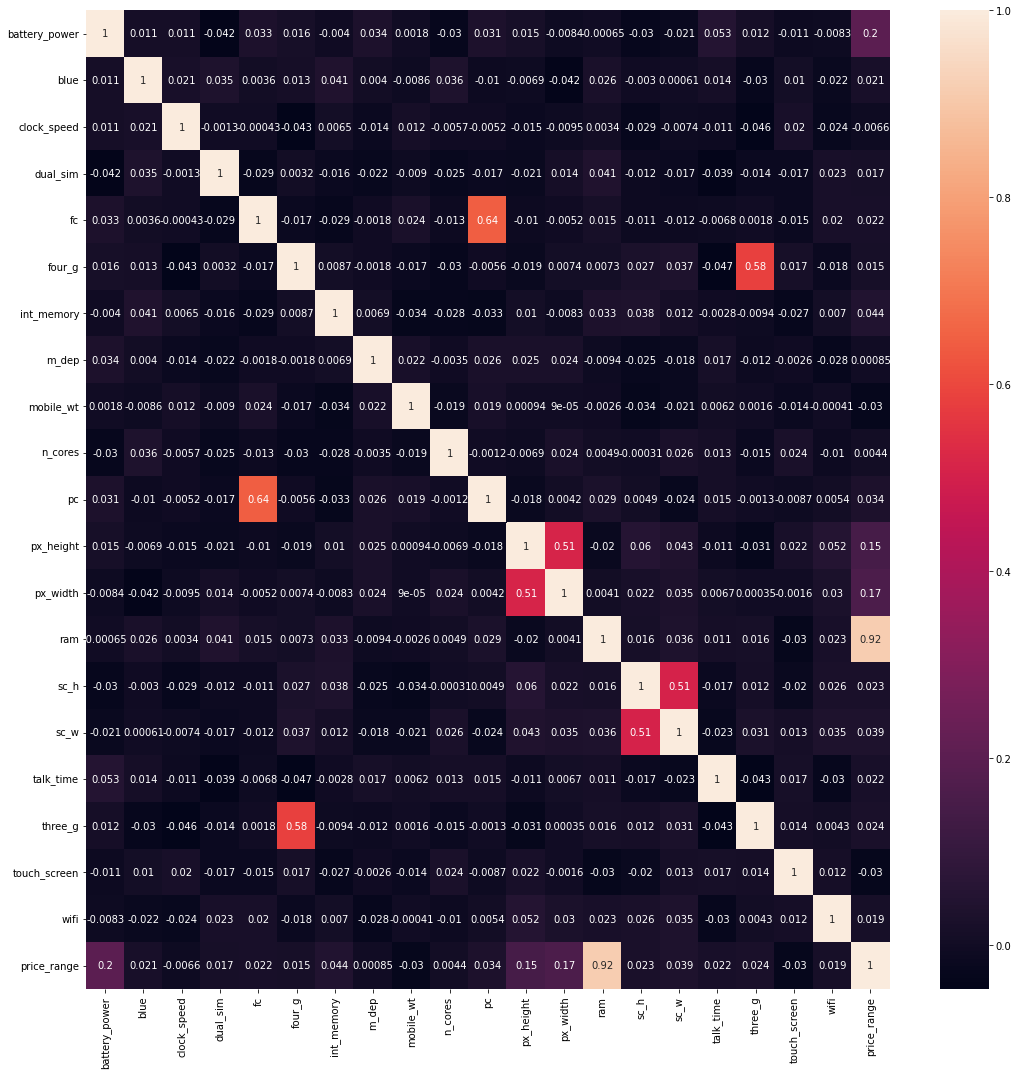

In [ ]:
plt.subplots(figsize = (18, 18))
sns.heatmap(train.corr(), annot = True)

In [ ]:
corr_cols_order = train.corr()['price_range'].sort_values(ascending=False).index
corr_cols_order

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h', 'fc', 'talk_time',
       'blue', 'wifi', 'dual_sim', 'four_g', 'n_cores', 'm_dep', 'clock_speed',
       'mobile_wt', 'touch_screen'],
      dtype='object')

Sorting and re-visualizing correlation between features

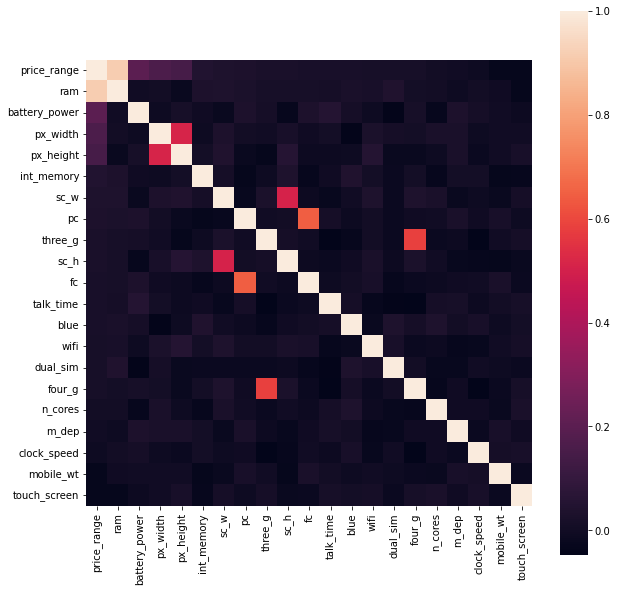

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[corr_cols_order].corr(), square=True)
plt.show()

# Training and Comparing Several Different ML Models

In [ ]:
x = train.drop("price_range",axis=1)
y= train["price_range"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mul_logis_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
mlr = mul_logis_reg.fit(x_train, y_train)

rnd_frst_class = RandomForestClassifier(n_estimators= 200, criterion="entropy")
rnfc = rnd_frst_class.fit(x_train, y_train)

kneighbours = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn = kneighbours.fit(x_train, y_train)

mlnb = MultinomialNB().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [ ]:
models = [mlr, rnfc, knn, mlnb]
for i in models:
  preds = i.predict(x_test)
  print(i, "model accuracy: ", accuracy_score(y_test, preds), '\n')

LogisticRegression(multi_class='multinomial', solver='newton-cg') model accuracy:  0.958 

RandomForestClassifier(criterion='entropy', n_estimators=200) model accuracy:  0.874 

KNeighborsClassifier() model accuracy:  0.924 

MultinomialNB() model accuracy:  0.53 



We can see that Multinomial Logistical Regression and KNN Classifier are highly effective on this dataset

# Training a DNN Model to Check for Better Accuracy

In [ ]:
x = train.drop('price_range', axis=1).values
x_predict = test.drop('id', axis=1).values
y =train['price_range'].values

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)
x_predict = sc.fit_transform(x_predict)

# Standardizes data based on mean and standard deviation

In [ ]:
ohe = OneHotEncoder()
y= ohe.fit_transform(y.reshape(-1, 1)).toarray()

# each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
dnnmodel = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(4, activation='softmax')
])
# layer of neurons in which each neuron receives input from all the neurons of previous layer

dnnmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# regularizer.L1L2 applies penalties on layer parameters to affect loss
# relu activation: output the input directly if it is positive, otherwise, it will output zero
# softmax activation: transforms the raw outputs of the neural network into a vector of probabilities
# adam optimizer: optimizes learning rate

In [ ]:
earlyStoppingCallback = EarlyStopping(patience=50)
# stops training once chosen metric stops improving

history = dnnmodel.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=1)

Epoch 1/400
102/102 [==============================] - 4s 5ms/step - loss: 9.5257 - accuracy: 0.4333 - val_loss: 5.4042 - val_accuracy: 0.5333
Epoch 2/400
102/102 [==============================] - 0s 3ms/step - loss: 3.1261 - accuracy: 0.5784 - val_loss: 1.7278 - val_accuracy: 0.6833
Epoch 3/400
102/102 [==============================] - 0s 4ms/step - loss: 1.3040 - accuracy: 0.7006 - val_loss: 1.0384 - val_accuracy: 0.8389
Epoch 4/400
102/102 [==============================] - 0s 4ms/step - loss: 0.9257 - accuracy: 0.8469 - val_loss: 0.8356 - val_accuracy: 0.9111
Epoch 5/400
102/102 [==============================] - 0s 3ms/step - loss: 0.7710 - accuracy: 0.9117 - val_loss: 0.7179 - val_accuracy: 0.9444
Epoch 6/400
102/102 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.9395 - val_loss: 0.6448 - val_accuracy: 0.9667
Epoch 7/400
102/102 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.9469 - val_loss: 0.6053 - val_accuracy: 0.9611

In [ ]:
dnnmodel.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.9650


[0.19978441298007965, 0.9649999737739563]

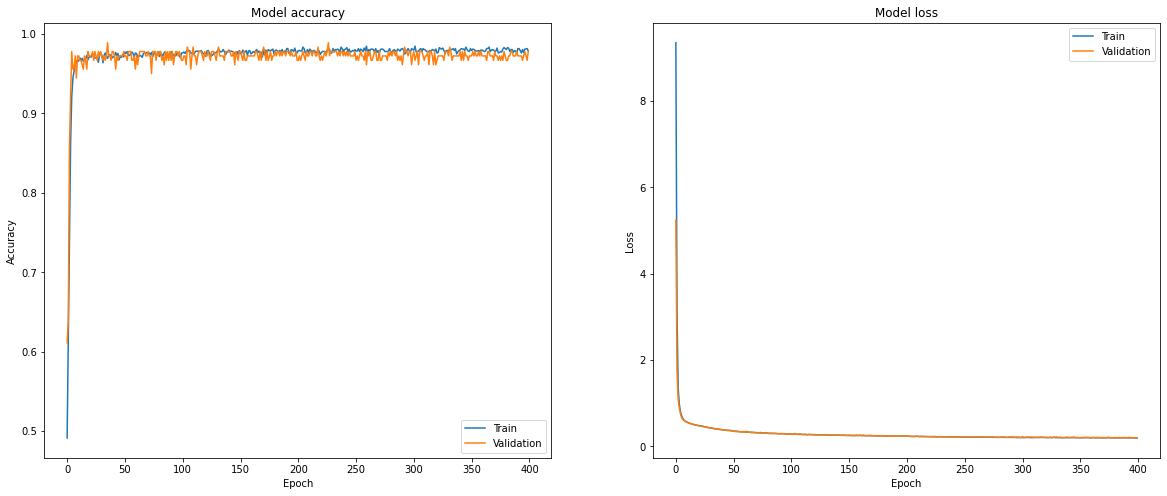

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'])

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=1)

Epoch 1/400
102/102 [==============================] - 1s 5ms/step - loss: 10.2046 - accuracy: 0.3593 - val_loss: 6.5179 - val_accuracy: 0.5722
Epoch 2/400
102/102 [==============================] - 0s 4ms/step - loss: 4.2217 - accuracy: 0.4815 - val_loss: 2.5358 - val_accuracy: 0.5500
Epoch 3/400
102/102 [==============================] - 0s 3ms/step - loss: 1.9316 - accuracy: 0.5531 - val_loss: 1.4538 - val_accuracy: 0.5722
Epoch 4/400
102/102 [==============================] - 0s 3ms/step - loss: 1.3165 - accuracy: 0.5716 - val_loss: 1.1028 - val_accuracy: 0.7111
Epoch 5/400
102/102 [==============================] - 0s 3ms/step - loss: 1.1685 - accuracy: 0.6117 - val_loss: 1.0102 - val_accuracy: 0.8000
Epoch 6/400
102/102 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.6531 - val_loss: 0.9514 - val_accuracy: 0.8167
Epoch 7/400
102/102 [==============================] - 0s 3ms/step - loss: 1.0774 - accuracy: 0.6500 - val_loss: 0.9251 - val_accuracy: 0.883

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.9450


[0.476683109998703, 0.9449999928474426]

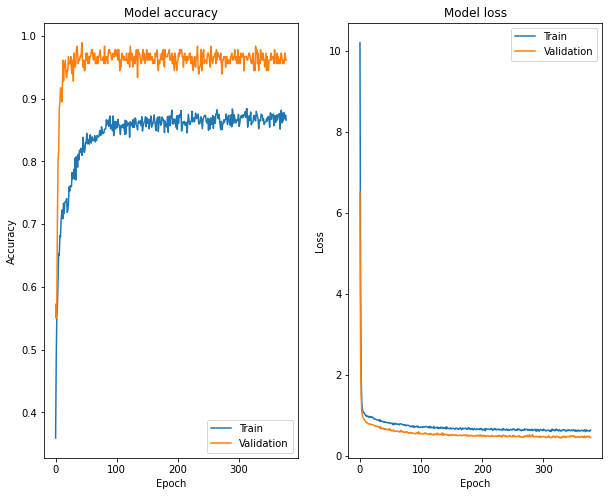

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'])

plt.show()

# Result: We can see that the DNN model without Dropouts performs better than the KNN Classifier and Multinomial Logistical Regression
That is why we will use this for the final user input predictions

In [ ]:
pred = dnnmodel.predict(x_predict)
predictions = []

for i in range(len(pred)):
    predictions.append(np.argmax(pred[i]))

for i in predictions[0:3]:
  if i == 0:
    print('\nLow End Smartphone')
    print('Top 3 choices:')
    print('1) Samsung M13 - https://cutt.ly/cMjBtSe')
    print('2) IQOO Lumina - https://cutt.ly/LMjBaHk')
    print('3) Redmi Note 9 - https://cutt.ly/HMjBlRA')
  elif i == 1:
    print('\nMid Range Smartphone')
    print('Top 3 choices:')
    print('1) Samsung A32 Lite - https://cutt.ly/cMjBtSe')
    print('2) Nokia Supra - https://cutt.ly/LMjBaHk')
    print('3) Xiaomi Cool 4 - https://cutt.ly/HMjBlRA')
  elif i == 2:
    print('\nHigh End Smartphone')
    print('Top 3 choices:')
    print('1) Samsung 52 - https://cutt.ly/cMjBtSe')
    print('2) IQOO Edge - https://cutt.ly/LMjBaHk')
    print('3) Redmi Z2 - https://cutt.ly/HMjBlRA')
  else:
    print('\nVery High End Smartphone')
    print('Top 3 choices:')
    print('1) Iphone 14 Pro Max - https://cutt.ly/cMjB4Yh')
    print('2) Samsung S22 Ultra - https://cutt.ly/9MjB1OE')
    print('3) Xiaomi 12S Ultra - https://cutt.ly/KMjBJwv')

32/32 [==============================] - 0s 1ms/step

Very High End Smartphone
Top 3 choices:
1) Iphone 14 Pro Max - https://cutt.ly/cMjB4Yh
2) Samsung S22 Ultra - https://cutt.ly/9MjB1OE
3) Xiaomi 12S Ultra - https://cutt.ly/KMjBJwv

Very High End Smartphone
Top 3 choices:
1) Iphone 14 Pro Max - https://cutt.ly/cMjB4Yh
2) Samsung S22 Ultra - https://cutt.ly/9MjB1OE
3) Xiaomi 12S Ultra - https://cutt.ly/KMjBJwv

High End Smartphone
Top 3 choices:
1) Samsung 52 - https://cutt.ly/cMjBtSe
2) IQOO Edge - https://cutt.ly/LMjBaHk
3) Redmi Z2 - https://cutt.ly/HMjBlRA
